In [2]:
import numpy as np

In [73]:
#1 Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.
arr=np.random.random((10,3))
i=(np.arange(10),np.abs(arr-0.5).argmin(axis=1))
print(arr)
print(arr[i])

[[0.81988829 0.77616006 0.50890693]
 [0.20857187 0.49060974 0.58455587]
 [0.60728519 0.0487043  0.13275671]
 [0.94887748 0.6516193  0.40571834]
 [0.87983848 0.50743352 0.88353013]
 [0.92837457 0.4445316  0.8435624 ]
 [0.98076177 0.55207856 0.90551653]
 [0.20890279 0.76254467 0.95406319]
 [0.00520207 0.84443228 0.85955833]
 [0.80342624 0.9248716  0.23766581]]
[0.50890693 0.49060974 0.60728519 0.40571834 0.50743352 0.4445316
 0.55207856 0.76254467 0.84443228 0.23766581]


In [74]:
#2 Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.
arr = np.random.random((6, 6))
print(arr)
print(arr.sum(axis=1) / arr.min(axis=0))

[[0.8034359  0.3758585  0.95177264 0.06384918 0.78810457 0.81520909]
 [0.21595796 0.02145085 0.06824274 0.8792197  0.95703469 0.33237228]
 [0.10692155 0.99056089 0.32736182 0.37632082 0.32826496 0.80893764]
 [0.72896294 0.41969569 0.92630141 0.16914828 0.87978883 0.79457512]
 [0.64187865 0.04191007 0.99686092 0.0246068  0.93906061 0.98399674]
 [0.60615419 0.47419588 0.34521582 0.86027118 0.24231786 0.51470567]]
[ 35.52351976 115.3463754   43.05758706 159.24348584  14.97336512
   9.15497703]


In [75]:
#3 На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.
arr=np.array([6,2,0,3,0,0,5,7,0])
arr[np.where(arr[:-1] == 0)[0] + 1].max()

5

In [76]:
#4
arr1=np.ones(10)
arr2=np.array([0,1,2,3,5,5,5,8])
np.add.at(arr1,arr2,1)
print(arr1)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [77]:
#5
from collections import defaultdict
n = 4
d = defaultdict(list)
arr = np.arange(16).reshape(n, n)
for j in range(n*2-1):
    for i in range(j+1):
        temp = []
        if i < n and j - i < n: d[j].append(arr[i, j - i])
print(arr)
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
defaultdict(<class 'list'>, {0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]})


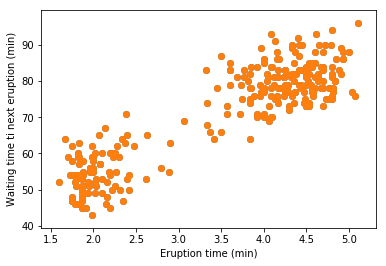

In [78]:
#6
import matplotlib.pyplot as plt

data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')

plt.scatter(*data.T)
plt.show()
data = (data - data.mean(axis=0)) / data.std(axis=0)

centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))


#plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
#plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
#plt.title('Predicted Classes')
#plt.show()

In [79]:
def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def solve(data, n, e):
    centroids = np.random.random((2, data.shape[1]))
    labels = get_labels(data, centroids)
    norm = norma(data, centroids, labels)
    minnm = norm
    newcen = centroids
        
    
    
    while 1:
        prevnm = norm
        centroids = np.array([data[labels == i].mean(axis=0) for i in range(2)])
        labels = get_labels(data, centroids)
        norm = norma(data, centroids, labels)       
        if norm < minnm:
            newcen = centroids
            minnm = norm

        n-=1;    
        if abs(norm - prevnm) < e:
            break
        if n == 0: break
            
    return newcen

def norma(data, centroids, labels):
    ans = 0
    for i in range(centroids.shape[0]):
        ans+= abs(np.linalg.norm(data[i==labels] - centroids[i], axis=1).sum())
    return ans/data.shape[0]

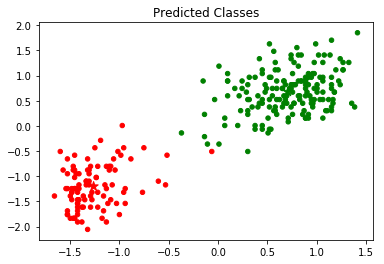

In [80]:
centroids = solve(data, 100, 1e-15)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()